# **Setup**
* https://towardsdatascience.com/a-guide-to-matplotlib-subfigures-for-creating-complex-multi-panel-figures-70fa8f6c38a4
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns

# **Data Import**

In [2]:
data = sns.load_dataset('mpg')

print(data.shape)
data.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# **Gridspec**

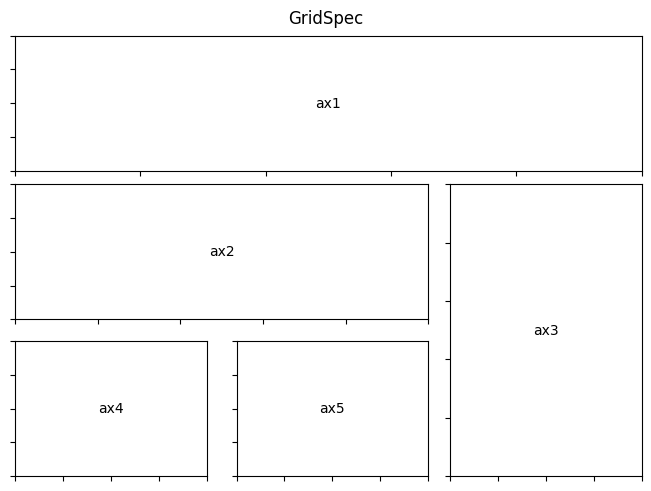

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(layout="constrained")

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])

fig.suptitle("GridSpec")
format_axes(fig)

plt.show()

# **Creating Subfigures**

## **Create Figure**

In [4]:
# Step 01 - Create A Figure
fig = plt.figure(figsize=(10, 7))
fig

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

## **Create Subfigures**

In [10]:
# Step 02 - Create Subfigures
(topfig, bottomfig) = fig.subfigures(2, 1)

topfig.set_facecolor('#cbe4c6ff')
topfig.suptitle('Top')

bottomfig.set_facecolor('#c6c8e4ff')
bottomfig.suptitle('Bottom')

Text(0.5, 0.98, 'Bottom')

## **Create Subplots**

In [13]:
top_axs = topfig.subplots(2, 4)
bottom_axs = bottomfig.subplots(3, 7)
plt.show()

## **Combined Code**

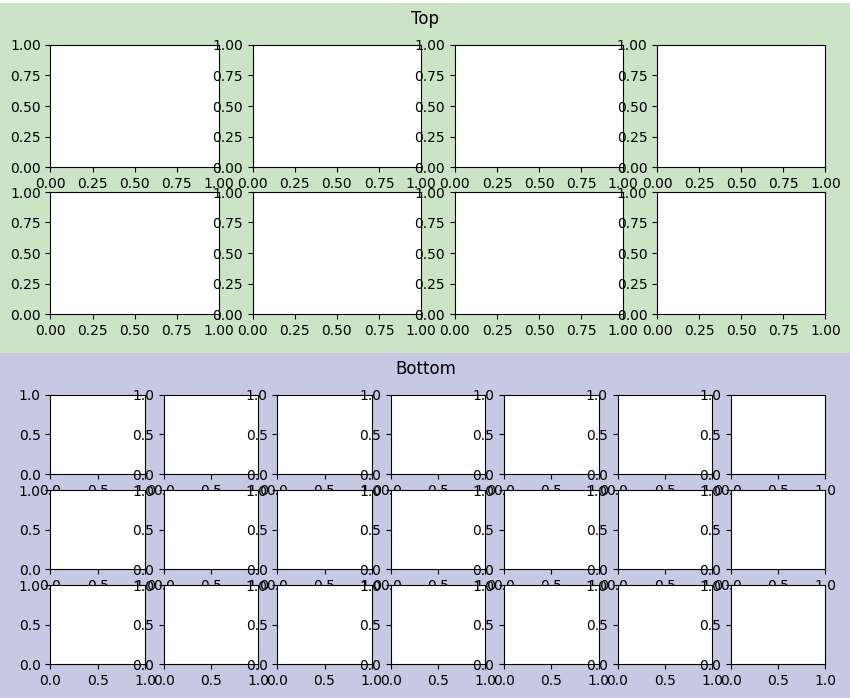

In [20]:
fig = plt.figure(figsize=(10, 7))
(topfig, bottomfig) = fig.subfigures(2, 1)

topfig.set_facecolor('#cbe4c6ff')
topfig.suptitle('Top')

bottomfig.set_facecolor('#c6c8e4ff')
bottomfig.suptitle('Bottom')

top_axs = topfig.subplots(2, 4)
bottom_axs = bottomfig.subplots(3, 7)
plt.show()

## **Set Size & Proportion Of Subplots**

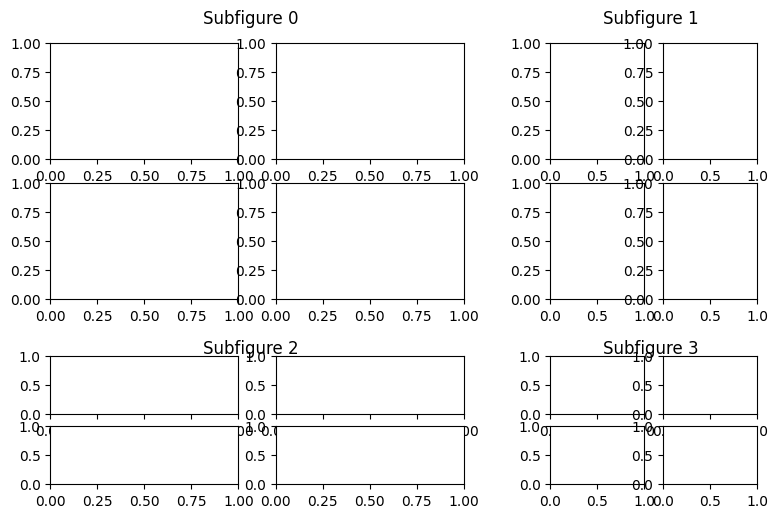

In [19]:
figure = plt.figure(figsize=(8,5))
figs = figure.subfigures(2, 2, height_ratios=(2,1), width_ratios=(2,1))

figs = figs.flatten()

for i, fig in enumerate(figs):
 fig.suptitle(f'Subfigure {i}')
 axs = fig.subplots(2, 2)

plt.show()

In [ ]:
# However, there is one drawback of subfigures.
# To eliminate overlapping labels or elements outside the figure, `plt.tight_layout()` is a good way of squeezing everything nicely into the figure. 
# However, this is not supported for subfigures. 
# Here you can see what happens if you try to use it:

## **Adjust Spacing**

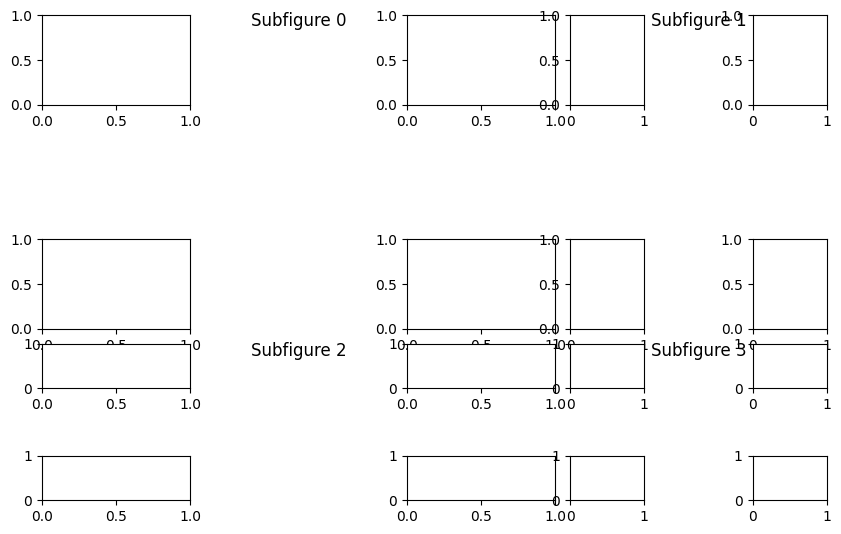

In [17]:
# Method 01 - Use Tight Layout Function (No Recommended)
figure = plt.figure(figsize=(8,5))
figs = figure.subfigures(2, 2, height_ratios=(2,1), width_ratios=(2,1))

figs = figs.flatten()

for i, fig in enumerate(figs):
 fig.suptitle(f'Subfigure {i}')
 axs = fig.subplots(2, 2)

plt.tight_layout()
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_8712\1556490366.py:16: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


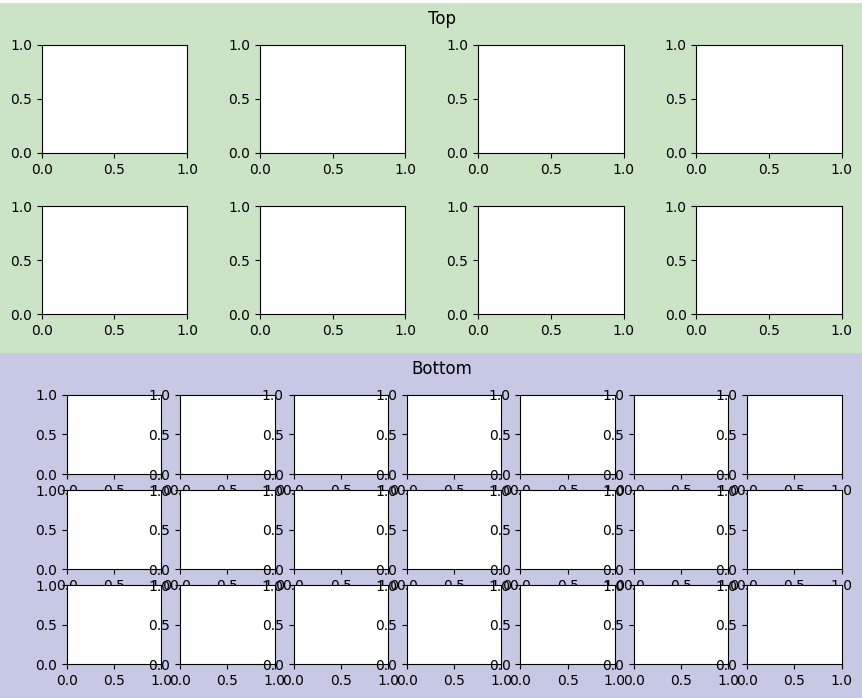

In [22]:
# Method 01 - Tight Layout Function (Not Recommended)
fig = plt.figure(figsize=(10, 7))
(topfig, bottomfig) = fig.subfigures(2, 1)

topfig.set_facecolor('#cbe4c6ff')
topfig.suptitle('Top')
bottomfig.set_facecolor('#c6c8e4ff')
bottomfig.suptitle('Bottom')

top_axs = topfig.subplots(2, 4)
bottom_axs = bottomfig.subplots(3, 7)

# Adding more space between plots and reducing the space to the sides
topfig.subplots_adjust(left=.1, right=.9, wspace=.5, hspace=.5)

# We can also squeeze subplots to the bottom
plt.tight_layout()
# bottomfig.subplots_adjust(wspace=.5, hspace=.8, top=.7, bottom=.3)

plt.show()

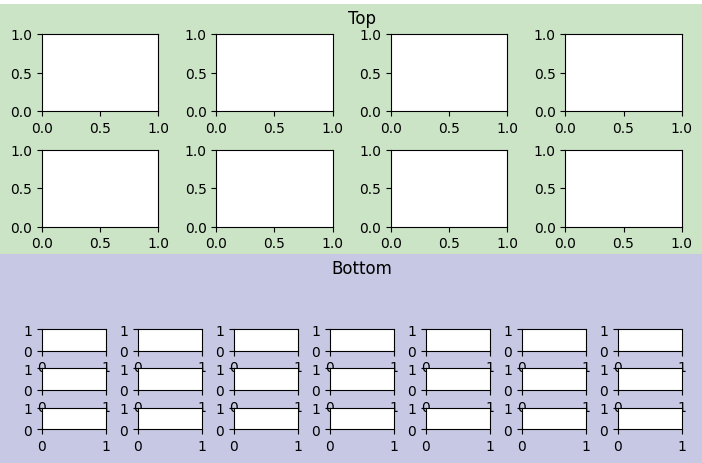

In [21]:
# Method 02 - Subplot Adjust (Recommended)
fig = plt.figure(figsize=(8,5))
(topfig, bottomfig) = fig.subfigures(2, 1)

topfig.set_facecolor('#cbe4c6ff')
topfig.suptitle('Top')

bottomfig.set_facecolor('#c6c8e4ff')
bottomfig.suptitle('Bottom')

top_axs = topfig.subplots(2, 4)
bottom_axs = bottomfig.subplots(3, 7)

# Adding more space between plots and reducing the space to the sides
topfig.subplots_adjust(left=.1, right=.9, wspace=.5, hspace=.5)

# We can also squeeze subplots to the bottom
bottomfig.subplots_adjust(wspace=.5, hspace=.8, top=.7, bottom=.3)

plt.show()

## **Nested Subfigures**

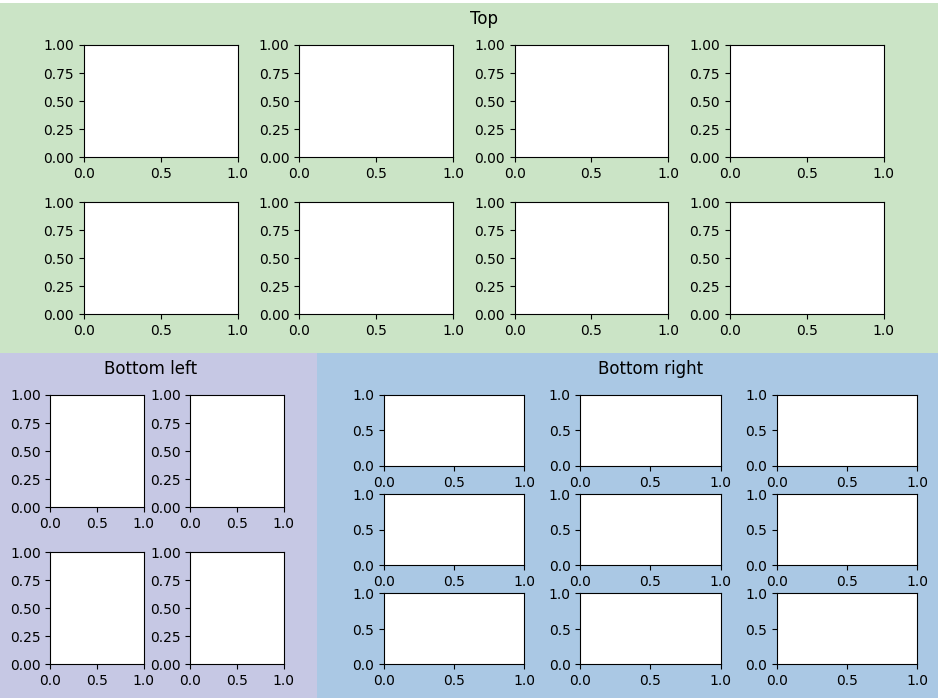

In [23]:
fig = plt.figure(figsize=(10, 7))
(topfig, bottomfig) = fig.subfigures(2, 1)

topfig.set_facecolor('#cbe4c6ff')
topfig.suptitle('Top')
top_axs = topfig.subplots(2, 4)


(bottomleft, bottomright) = bottomfig.subfigures(1, 2, width_ratios=(1,2))


bottomleft.set_facecolor('#c6c8e4ff')
bottomleft.suptitle('Bottom left')
bottom_axs = bottomleft.subplots(2, 2)

bottomright.set_facecolor('#aac8e4ff')
bottomright.suptitle('Bottom right')
bottom_axs = bottomright.subplots(3, 3)

# Spacing between subplots
topfig.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)
bottomleft.subplots_adjust(left=.2, right=.9, wspace=.5, hspace=.4)
bottomright.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

plt.show()

# **Seaborn Jointplot**

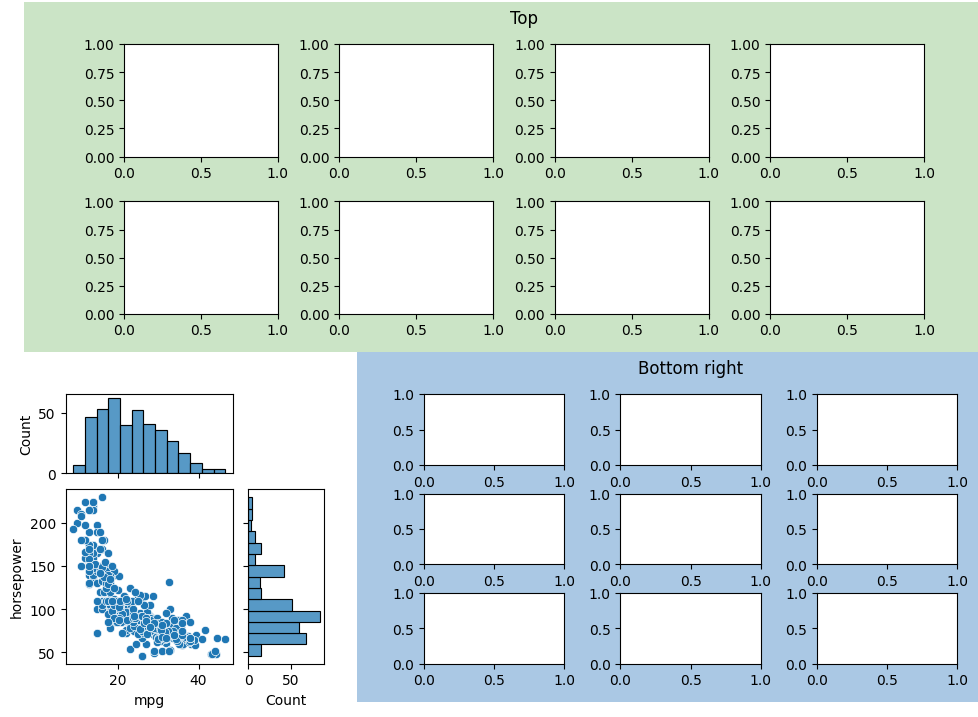

In [24]:
fig = plt.figure(figsize=(10, 7))
(topfig, bottomfig) = fig.subfigures(2, 1)

topfig.set_facecolor('#cbe4c6ff')
topfig.suptitle('Top')
top_axs = topfig.subplots(2, 4)

# We are using the bottom left subfigure for the jointplot
(bottomleft, bottomright) = bottomfig.subfigures(1, 2, width_ratios=(1,2))


# This parameter defines the size ratio between the main plot and the margin plots
ratio=2

# Defining a gridspec where the subplots are places
gs = plt.GridSpec(ratio + 1, ratio + 1)
# The main scatterplot
ax_joint  = bottomleft.add_subplot(gs[1:, :-1])
# The margin plots are sharing an axis with the main plot
ax_marg_x = bottomleft.add_subplot(gs[0, :-1], sharex=ax_joint)
ax_marg_y = bottomleft.add_subplot(gs[1:, -1], sharey=ax_joint)

# Axis labels and ticklabels for the margin plots are set to not visible
# Since they are shared with the main plot,
# removing them for the margin will also remove them from the main plot
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)
plt.setp(ax_marg_x.get_xticklabels(minor=True), visible=False)
plt.setp(ax_marg_y.get_yticklabels(minor=True), visible=False)

# Filling the plots with data:
sns.scatterplot(data=data, y='horsepower', x='mpg', ax=ax_joint)
sns.histplot(data=data, y='horsepower', ax=ax_marg_y)
sns.histplot(data=data, x='mpg', ax=ax_marg_x)


bottomright.set_facecolor('#aac8e4ff')
bottomright.suptitle('Bottom right')
bottom_axs = bottomright.subplots(3, 3)

# Spacing between subplots
topfig.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)
bottomright.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

plt.show()

# **Annotations**

In [25]:
def letter_annotation(ax, xoffset, yoffset, letter):
 ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
         size=12, weight='bold')

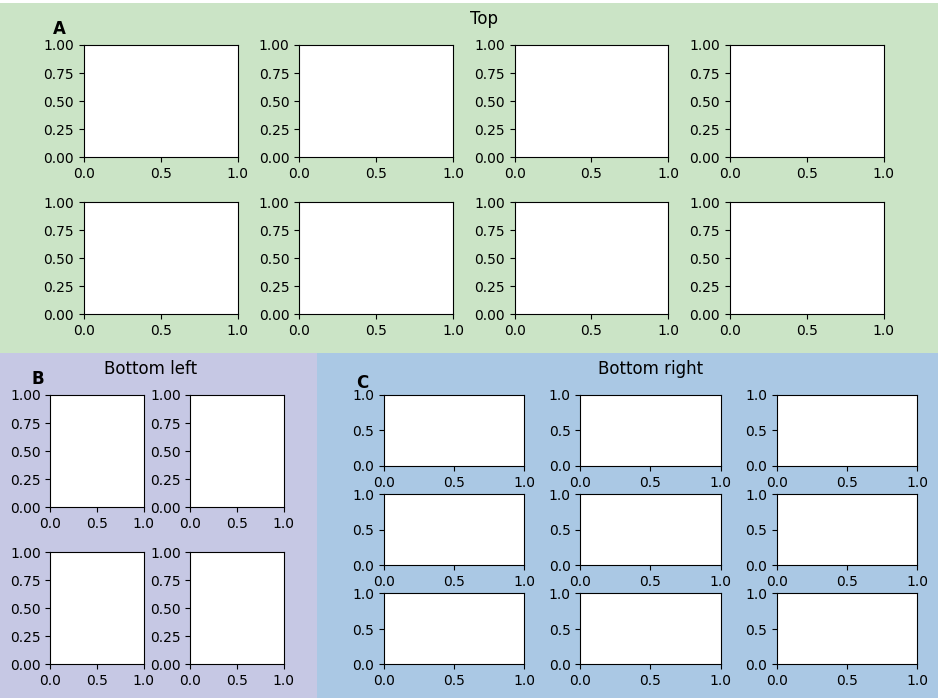

In [26]:
fig = plt.figure(figsize=(10, 7))
(topfig, bottomfig) = fig.subfigures(2, 1)

topfig.set_facecolor('#cbe4c6ff')
topfig.suptitle('Top')
top_axs = topfig.subplots(2, 4)
letter_annotation(top_axs[0][0], -.2, 1.1, 'A')

(bottomleft, bottomright) = bottomfig.subfigures(1, 2, width_ratios=(1,2))


bottomleft.set_facecolor('#c6c8e4ff')
bottomleft.suptitle('Bottom left')
bottoml_axs = bottomleft.subplots(2, 2)
letter_annotation(bottoml_axs[0][0], -.2, 1.1, 'B')

bottomright.set_facecolor('#aac8e4ff')
bottomright.suptitle('Bottom right')
bottomr_axs = bottomright.subplots(3, 3)
letter_annotation(bottomr_axs[0][0], -.2, 1.1, 'C')

# Spacing between subplots
topfig.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)
bottomleft.subplots_adjust(left=.2, right=.9, wspace=.5, hspace=.4)
bottomright.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

plt.show()

# **Final Demo Plot**

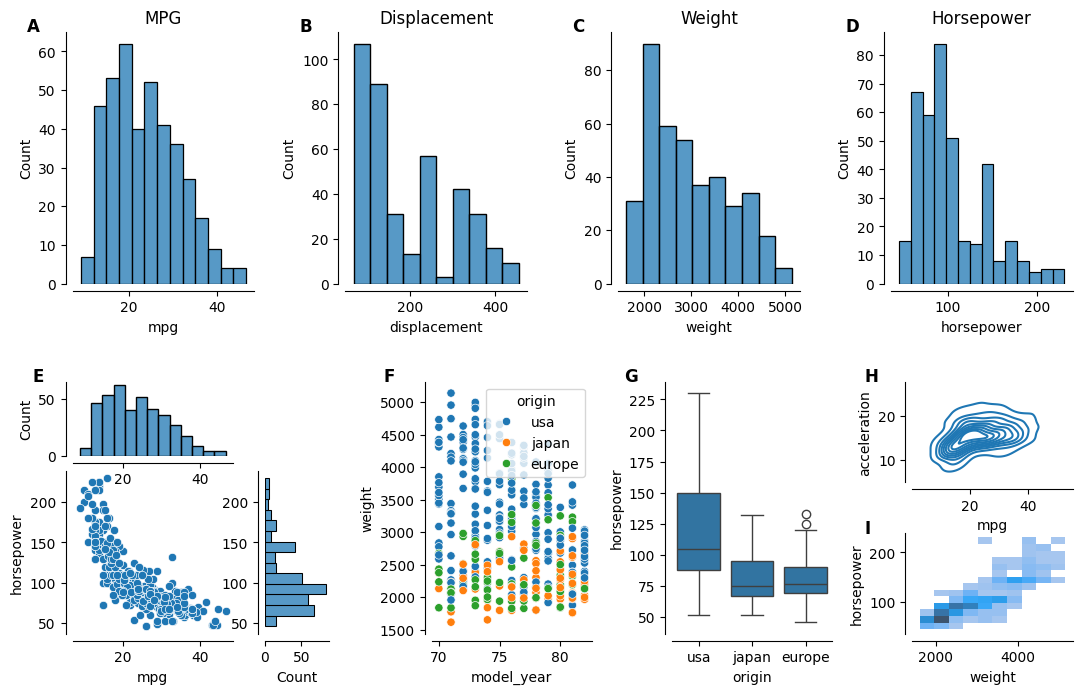

In [27]:
fig = plt.figure(figsize=(10, 7))

# Creating a subfigure for the first and second row
(row1fig, row2fig) = fig.subfigures(2, 1, height_ratios=[1, 1])
# Splitting the bottom row subfigure in two subfigures
(fig_row2left, fig_row2right) = row2fig.subfigures(1, 2, wspace=.08, width_ratios = (1, 2))


# #####
# Row 1 plots
# #####

# Make 4 subplots for the first row subfigure
row1_axs = row1fig.subplots(1, 4)

row1fig.subplots_adjust(wspace=0.5, left=0, right=1, bottom=.16)

ax = row1_axs[0]
sns.histplot(data=data, x='mpg', ax=ax)
ax.set_title('MPG')
# Annotate plotots with letters
letter_annotation(ax, -.25, 1, 'A')
# Some styling for figures to make them look better 
# and have a standardized look
sns.despine(offset=5, trim=False, ax=ax)

ax = row1_axs[1]
sns.histplot(data=data, x='displacement', ax=ax)
ax.set_title('Displacement')
letter_annotation(ax, -.25, 1, 'B')
sns.despine(offset=5, trim=False, ax=ax)

ax = row1_axs[2]
sns.histplot(data=data, x='weight', ax=ax)
ax.set_title('Weight')
letter_annotation(ax, -.25, 1, 'C')
sns.despine(offset=5, trim=False, ax=ax)

ax = row1_axs[3]
sns.histplot(data=data, x='horsepower', ax=ax)
ax.set_title('Horsepower')
letter_annotation(ax, -.25, 1, 'D')
sns.despine(offset=5, trim=False, ax=ax)

# #####
# Row 2 plots
# #####

# ##
# Seaborn jointplot
# ##

# Using code from the Seaborn JointGrid class

# size ratio between the main plots and the margin plots
ratio=2
# Defining a gridspec for inside the subfigure
gs = plt.GridSpec(ratio + 1, ratio + 1)
ax_joint  = fig_row2left.add_subplot(gs[1:, :-1])
# Share axis between the margin and main plots
ax_marg_x = fig_row2left.add_subplot(gs[0, :-1], sharex=ax_joint)
ax_marg_y = fig_row2left.add_subplot(gs[1:, -1], sharey=ax_joint)

# Remove Axis labels and ticklabels for the margin plots
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)
plt.setp(ax_marg_x.get_xticklabels(minor=True), visible=False)
plt.setp(ax_marg_y.get_yticklabels(minor=True), visible=False)

sns.scatterplot(data=data, y='horsepower', x='mpg', ax=ax_joint)
sns.histplot(data=data, y='horsepower', ax=ax_marg_y)
sns.histplot(data=data, x='mpg', ax=ax_marg_x)

sns.despine(offset=5, trim=False, ax=ax_joint)
sns.despine(offset=5, trim=False, ax=ax_marg_y)
sns.despine(offset=5, trim=False, ax=ax_marg_x)

# Leaving some space to the right to remove overlaps
fig_row2left.subplots_adjust(left=0, right=.8)
letter_annotation(ax_marg_x, -.25, 1, 'E')

# ##
# Row 2 right plots
# ##

gs = plt.GridSpec(2, 3)
ax_left   = fig_row2right.add_subplot(gs[:, 0])
ax_middle = fig_row2right.add_subplot(gs[:, 1])
ax_up     = fig_row2right.add_subplot(gs[0, 2])
ax_down   = fig_row2right.add_subplot(gs[1, 2])

fig_row2right.subplots_adjust(left=0, right=1, hspace=.5)

ax = ax_left
sns.scatterplot(data=data, x='model_year', y='weight', hue='origin', ax=ax)
sns.despine(offset=5, trim=False, ax=ax)
letter_annotation(ax, -.3, 1, 'F')

ax = ax_middle
sns.boxplot(data=data, x='origin', y='horsepower', ax=ax)
sns.despine(offset=5, trim=False, ax=ax)
letter_annotation(ax, -.3, 1, 'G')

ax = ax_up
sns.kdeplot(data=data, x='mpg', y='acceleration', ax=ax)
sns.despine(offset=5, trim=False, ax=ax)
letter_annotation(ax, -.3, 1, 'H')

ax = ax_down
sns.histplot(data=data, x='weight', y='horsepower', ax=ax)
sns.despine(offset=5, trim=False, ax=ax)
letter_annotation(ax, -.3, 1, 'I')

plt.show()